In [1]:
import numpy as np

In [ ]:
class Constellation:
    def __init__(self,number_timesteps,omega,angle_noise_std_dev,freq_offset_fs_ratio,SNR) -> None:
        self.number_timesteps = number_timesteps
        self.angle_noise_std_dev=angle_noise_std_dev
        self.awgn_channel_noise_std_dev=np.sqrt(1/10**(SNR/10))  #As we are taking constellations in unit radius circle ie energy=1 then variance = 1/SNR
        self.basis=[(1/np.sqrt(2),1/np.sqrt(2)),(1/np.sqrt(2),-1/np.sqrt(2)),(-1/np.sqrt(2),1/np.sqrt(2)),(-1/np.sqrt(2),-1/np.sqrt(2))]
        self.freq_offset_fs_ratio=freq_offset_fs_ratio
        #self.radius=np.sqrt(2)
    
    def shift_by_phase(self,constellation,phase_shift):
        r=np.sqrt(constellation[0]**2+constellation[1]**2)
        phase=np.arctan2(constellation[1],constellation[0])
        return [r*np.cos(phase+phase_shift),r*np.sin(phase+phase_shift)]
    def generate_constellations(self):
        constellation_array=np.zeros((self.number_timesteps,2))
        cumulative_noise=0
        for i in range(self.number_timesteps):
            basis_num=np.random.randint(0,4)
            phase_noise=np.random.normal(0,self.angle_noise_std_dev)
            cumulative_noise+=phase_noise
            awgn_channel_noise=[np.random.normal(0,self.awgn_channel_noise_std_dev),np.random.normal(0,self.awgn_channel_noise_std_dev)]
            #print(awgn_channel_noise)
            freq_offset_phase=self.freq_offset_fs_ratio*i
            constellation_array[i]=self.shift_by_phase(self.basis[basis_num],cumulative_noise+freq_offset_phase)
            constellation_array[i]+=awgn_channel_noise
        return constellation_array

def deg_to_rad(degree_angle):
    return np.pi/180*degree_angle

freq_offset=1e4
fs=1e9
const=Constellation(20,deg_to_rad(0.7),angle_noise_std_dev=deg_to_rad(0),freq_offset_fs_ratio=0,SNR=10)
constellation_array=const.generate_constellations()
print(constellation_array)


[[-0.85369791  1.18941501]
 [-0.22364285 -0.70236228]
 [-1.1275302  -0.65209989]
 [ 0.73093494  0.85926607]
 [ 0.94737247 -0.44333291]
 [-0.29993759  0.91212748]
 [-0.7322074  -0.62395937]
 [-0.63910984  0.40123683]
 [-0.83897889 -0.42786058]
 [ 0.45592758 -0.80045962]
 [ 0.99915013 -0.46342075]
 [-0.97651247  1.21311669]
 [-0.58863561  0.88506391]
 [ 0.78391231  0.56680703]
 [ 1.41786318  0.43676686]
 [ 0.44695442  0.91485687]
 [ 0.79000627  0.84089445]
 [ 0.18273978  0.48583161]
 [-0.93087931  0.7806426 ]
 [-0.4745892  -1.33612216]]


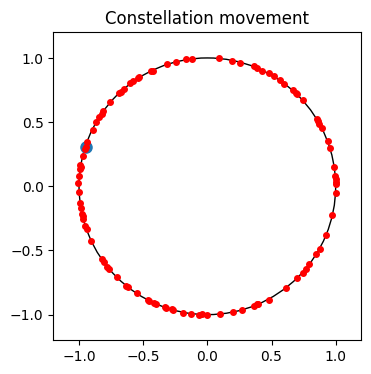

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%matplotlib inline

def plot_angle_animation(points):
    # Expect points of shape (n, 2)
    xs = points[:, 0]
    ys = points[:, 1]

    # Figure setup
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title("Constellation movement")

    # Unit circle
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_patch(circle)

    # Artists: a point + a trail
    point, = ax.plot([], [], marker='o', markersize=8, linestyle='None')
    trail, = ax.plot([], [], marker='o', markersize=4, linestyle='None', color='r')

    def update(i):
        point.set_data([xs[i]], [ys[i]])
        trail.set_data(xs[:i+1], ys[:i+1])
        return point, trail

    ani = FuncAnimation(fig, update,
                        frames=len(points), interval=50, blit=True)

    return ani

# Example with shape (n,2)
c_obj=Constellation(100,deg_to_rad(0.7),angle_noise_std_dev=deg_to_rad(0),freq_offset_fs_ratio=0.1,SNR=50)
points = c_obj.generate_constellations()   # random points inside [-1,1]
ani = plot_angle_animation(points)
HTML(ani.to_jshtml())